In [22]:
import matplotlib.pyplot as plt
import numpy

In [23]:
# questa funzione ci ritornerà delle variabili aleatorie        ###
# estratte secondo la distribuzione di bernulli con parametro p ###
def get_bernulli_random_variable(p=0.5):
    def random_variable():
        return 1 if numpy.random.random()<p else 0
    return random_variable

# costruiamo una variabile aleatoria corrispondente a una moneta "fair" ###
f0 = get_bernulli_random_variable(0.5)

# facciamo un po' di test ###
for i in range(10):
    print(f0(), end=" ")
print()

1 0 1 0 1 0 0 0 0 1 


In [55]:
# verifichiamo che il valore atteso di una bernulliana di parametro p è proprio p ###
# e che la varianza è p(1-p)                                                      ###

p = 0.75
theoretical_mean = p
theoretical_variance = p*(1-p)

f0 = get_bernulli_random_variable(p=0.75)
# facciamo un milione di test ###
tests = [f0() for i in range(10**2)]

print("the computed mean is       :",numpy.mean(tests))
print("the theoretical mean is    :",theoretical_mean)
print("the computed variance is   :",numpy.var(tests))
print("the theoretical variance is:",theoretical_variance)

the computed mean is       : 0.79
the theoretical mean is    : 0.75
the computed variance is   : 0.1659
the theoretical variance is: 0.1875


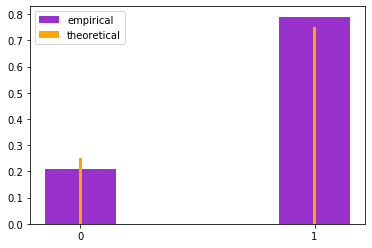

In [56]:
### plottiamo anche un istogramma ###
fig, ax = plt.subplots()
ax.hist(tests, bins=[0,1,2], density=True, align="left", color="darkorchid", rwidth=0.3)
ax.bar([0,1],[1-p,p], align="center", color="orange", width=0.01)
ax.set_xticklabels([0,1])
ax.set_xticks([0,1])
ax.legend(("empirical", "theoretical"))
#del tests

In [57]:
# la distribuzione binomiale B(n,p) somma n variabili aleatorie indipendenti ###
def get_binomial_random_variable(n=5,p=0.5):
    # costruiamo n bernulliane di parametro p
    rvs = [get_bernulli_random_variable(p) for i in range(n)]
    def random_variable():
        return sum([rv() for rv in rvs])
    return random_variable

f0 = get_binomial_random_variable(n=5,p=0.5)

# facciamo un po' di test ###
for i in range(10):
    print(f0(), end=" ")

3 4 3 4 4 2 1 1 2 1 

In [137]:
# verifichiamo che il valore atteso di una binomiale di parametro n,p è n*p ###
# e che la varianza è n*p*(1-p)                                             ###

p = 0.75
n = 10
theoretical_mean = n*p
theoretical_variance = n*p*(1-p)

f0 = get_binomial_random_variable(n=n,p=p)

# facciamo un milione di test ###
tests = [f0() for i in range(10**2)]

print("the computed mean is       :",numpy.mean(tests))
print("the theoretical mean is    :",theoretical_mean)
print("the computed variance is   :",numpy.var(tests))
print("the theoretical variance is:",theoretical_variance)

the computed mean is       : 7.58
the theoretical mean is    : 7.5
the computed variance is   : 2.0435999999999996
the theoretical variance is: 1.875


In [138]:
# costruiamo la distribuzione binomiale teorica ###

# ci serve la funzione fattoriale ###
def factorial(n):
    assert n >= 0
    return 1 if n < 2 else n*factorial(n-1)

# usando il fattoriale possiamo calcolare il coefficiente binomiale ###
def binomial_coeff(n,k):
    assert n >= k and n >= 0 and k >= 0
    return factorial(n)//(factorial(k)*factorial(n-k))
     
# usando il coefficiente binomiale possiamo calcolare la distribuzione binomiale ###
def binomial_dist(n,p):
    assert p >= 0 and p <= 1 and n >= 0
    return [binomial_coeff(n,k)*(p**k)*(1-p)**(n-k) for k in range(n+1)]

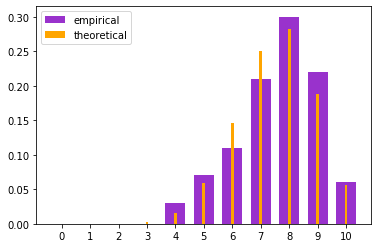

In [140]:
# ancora una volta, facciamo il plot dell'istogramma ###
fig, ax = plt.subplots()
ax.hist(tests, bins=numpy.arange(n+2)-0.5, density=True, align="mid", color="darkorchid", rwidth=0.7)
ax.bar(range(n+1), binomial_dist(n,p), align="center", color="orange", width=0.1)
ax.set_xticklabels(range(n+1))
ax.set_xticks(range(n+1))
ax.legend(("empirical", "theoretical"))
del tests

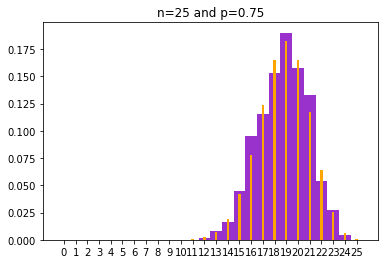

In [162]:
# possiamo giocare un po' con la binomiale                    ###
# creaiamo una funzione che plotti una simulazione dati n e p ###
# e la compari con la controparte teorica                     ###

def plot_binomial(n=5,p=0.5,steps=10**5):
    rv = get_binomial_random_variable(n=n,p=p)
    tests = [rv() for i in range(steps)]
    fig, ax = plt.subplots()
    ax.hist(tests, bins=numpy.arange(n+2)-0.5, density=True, align="mid", color="darkorchid", rwidth=1, zorder=0)
    ax.bar(range(n+1), binomial_dist(n,p), align="center", color="orange", zorder=1, width=0.2)
    ax.set_xticklabels(range(n+1))
    ax.set_xticks(range(n+1))
    ax.set_title("n={} and p={}".format(n,p))
    del tests, fig, ax

plot_binomial(n=25,p=0.75,steps=1000)

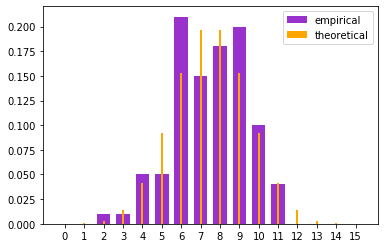

In [173]:
# numpy ha il suo interno gìà la binomiale ###

n=15
p=0.5

tests = [numpy.random.binomial(n,p) for i in range(10**2)]

fig, ax = plt.subplots()
ax.hist(tests, bins=numpy.arange(n+2)-0.5, density=True, align="mid", color="darkorchid", rwidth=0.7)
ax.bar(range(n+1), binomial_dist(n,p), align="center", color="orange", width=0.1)
ax.set_xticklabels(range(n+1))
ax.set_xticks(range(n+1))
ax.legend(("empirical", "theoretical"))
del tests

In [199]:
# possiamo fare dei plot comparando la binomiale con la normale ###
import math

#def sampled_normal_distribution(mu=0,sigma=1):
#    return math.exp(-0.5*(c-mu))/(sigma*(2*math.py)**0.5)



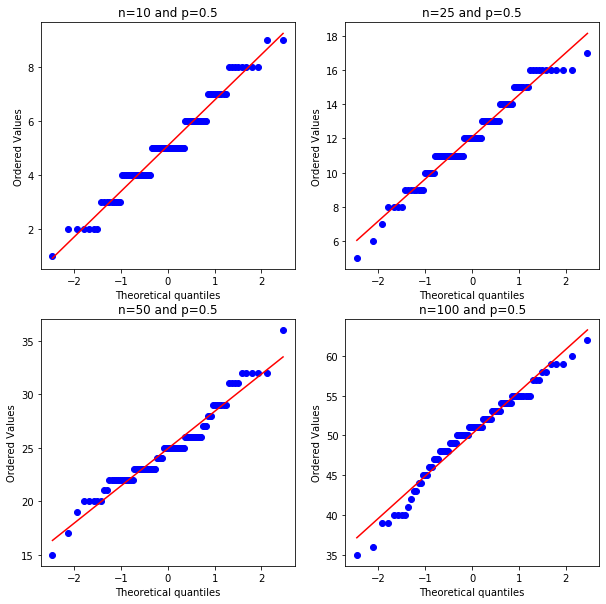

In [197]:
# possiamo comparare fare il qqplot della binomiale e della normale ###

import scipy.stats as stats

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10,10)

tests = [numpy.random.binomial(10,0.5) for i in range(10**2)]
plot = stats.probplot(tests, dist="norm", plot=ax[0][0])
ax[0][0].set_title("n={} and p={}".format(10,0.5))

tests = [numpy.random.binomial(25,0.5) for i in range(10**2)]
plot = stats.probplot(tests, dist="norm", plot=ax[0][1])
ax[0][1].set_title("n={} and p={}".format(25,0.5))

tests = [numpy.random.binomial(50,0.5) for i in range(10**2)]
plot = stats.probplot(tests, dist="norm", plot=ax[1][0])
ax[1][0].set_title("n={} and p={}".format(50,0.5))

tests = [numpy.random.binomial(100,0.5) for i in range(10**2)]
plot = stats.probplot(tests, dist="norm", plot=ax[1][1])
ax[1][1].set_title("n={} and p={}".format(100,0.5))

del tests